# The goal of this task is to prepare titanic data set for further analysis using pandas and numpy. Playing with data types, null values (replacing by mean, mode), playing with string values, using map function

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
plt.style.use("fivethirtyeight")

In [242]:
df = pd.read_excel('stinky_titanic_data.xlsx')

In [243]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Mr ,Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Mrs ,John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Miss ,Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Mrs ,Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Mr ,William Henry",male,NaN,0,0,373450,8.0500,NaN,S
5,6,0,3,"Mr ,James",male,thirty eight,0,0,330877,8.4583,NaN,Q
6,7,0,1,"Mr ,Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Master ,Gosta Leonard",male,two,3,1,349909,21.0750,NaN,S
8,9,1,3,"Mrs ,Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Mrs ,Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     890 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


## Creating custom stats table

In [245]:
#custom stats table inspired by capabilities of power bi and adding suggestions regading key value and data type

df_stats_count = df.count().to_frame().reset_index().rename(columns={'index':'column_name', 0:'count'})
df_stats_dtype = df.dtypes.to_frame().reset_index().rename(columns={'index':'column_name', 0:'dtype'})
df_stats_unique = df.nunique().reset_index().rename(columns={'index':'column_name', 0:'unique'})
df_stats_describe = df.describe().T.astype('int').reset_index().rename(columns={'index':'column_name'})
df_stats_describe = df_stats_describe.drop(columns={'count'})

df_stats = pd.merge(left=df_stats_count, right=df_stats_unique, how='left', on='column_name')
df_stats = pd.merge(left=df_stats, right=df_stats_describe, how='left', on='column_name')
df_stats = df_stats.fillna('-')
df_stats = pd.merge(left=df_stats, right = df_stats_dtype, how='left', on='column_name')

df_stats['key'] = np.where(df_stats['count']==df_stats['unique'], 'probably', '-')
df_stats_nulls = df.isnull().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'nulls'})
df_stats = pd.merge(left=df_stats, right=df_stats_nulls, on='column_name', how='left')
df_stats['category'] = np.where(df_stats['unique']<=9, 'probably', '-')
df_stats['boolean'] = np.where(df_stats['unique']==2, 'probably', '-')
df_stats['completness'] = (df_stats['count']/df_stats['count'].max()*100).round(2)
df_stats

,column_name,count,unique,mean,std,min,25%,50%,75%,max,dtype,key,nulls,category,boolean,completness
0,PassengerId,891,891,446.0,257.0,1.0,223.0,446.0,668.0,891.0,int64,probably,0,-,-,100.00
1,Survived,891,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,int64,-,0,probably,probably,100.00
2,Pclass,891,3,2.0,0.0,1.0,2.0,3.0,3.0,3.0,int64,-,0,probably,-,100.00
3,Name,891,807,-,-,-,-,-,-,-,object,-,0,-,-,100.00
4,Sex,891,2,-,-,-,-,-,-,-,object,-,0,probably,probably,100.00
5,Age,714,92,-,-,-,-,-,-,-,object,-,177,-,-,80.13
6,SibSp,891,7,0.0,1.0,0.0,0.0,0.0,1.0,8.0,int64,-,0,probably,-,100.00
7,Parch,891,7,0.0,0.0,0.0,0.0,0.0,0.0,6.0,int64,-,0,probably,-,100.00
8,Ticket,891,681,-,-,-,-,-,-,-,object,-,0,-,-,100.00
9,Fare,891,248,32.0,49.0,0.0,7.0,14.0,31.0,512.0,float64,-,0,-,-,100.00


In [246]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.0,891.000000,891.000000,891.0,891.000000,204,890
unique,NaN,NaN,NaN,807,2,92.0,NaN,NaN,681.0,NaN,147,3
top,NaN,NaN,NaN,"Mr , John",male,24.0,NaN,NaN,347082.0,NaN,B96 B98,S
freq,NaN,NaN,NaN,7,577,30.0,NaN,NaN,7.0,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,NaN,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,NaN,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN


## PassengerId

In [247]:
df['PassengerId'].min()

1

In [248]:
df['PassengerId'].max()

891

In [249]:
df['PassengerId'].dtype

dtype('int64')

In [250]:
df['PassengerId'] = df['PassengerId'].astype('int32')

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int32  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     890 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 80.2+ KB


### Survived

In [252]:
#changing survived column to boolean
df['Survived'] = df['Survived'].astype('bool')

### Pclass

In [253]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [254]:
df['Pclass'].nunique()

3

In [255]:
df['Pclass'] = df['Pclass'].astype('category')

### Name

In [256]:
# adding new column called 'Title'
# splitting the name and title, removing spaces
df.insert(4, 'Title', '')
df['Title'] = df['Name'].str.split(',', expand=True)[0].str.strip()
df['Name'] = df['Name'].str.split(',', expand=True)[1].str.strip()

In [257]:
df.head()

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,Owen Harris,Mr,male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,John Bradley (Florence Briggs Thayer),Mrs,female,38,1,0,PC 17599,71.2833,C85,C
2,3,True,3,Laina,Miss,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,Jacques Heath (Lily May Peel),Mrs,female,35,1,0,113803,53.1000,C123,S
4,5,False,3,William Henry,Mr,male,NaN,0,0,373450,8.0500,NaN,S


In [258]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', '', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess'],
      dtype=object)

In [259]:
# showing frequency between title and sex
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
,0,2
Capt,0,1
Col,0,2
Countess,1,0
Dr,1,6
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [260]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Dr', 'Major', 'Rev', 'Sir'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', '', 'Rare'], dtype=object)

In [261]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
,0,2
Master,0,40
Miss,184,0
Mr,0,517
Mrs,127,0
Rare,3,18


In [262]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,Owen Harris,Mr,male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,John Bradley (Florence Briggs Thayer),Mrs,female,38,1,0,PC 17599,71.2833,C85,C
2,3,True,3,Laina,Miss,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,Jacques Heath (Lily May Peel),Mrs,female,35,1,0,113803,53.1000,C123,S
4,5,False,3,William Henry,Mr,male,NaN,0,0,373450,8.0500,NaN,S
5,6,False,3,James,Mr,male,thirty eight,0,0,330877,8.4583,NaN,Q
6,7,False,1,Timothy J,Mr,male,54,0,0,17463,51.8625,E46,S
7,8,False,3,Gosta Leonard,Master,male,two,3,1,349909,21.0750,NaN,S
8,9,True,3,Oscar W (Elisabeth Vilhelmina Berg),Mrs,female,27,0,2,347742,11.1333,NaN,S
9,10,True,2,Nicholas (Adele Achem),Mrs,female,14,1,0,237736,30.0708,NaN,C


In [263]:
df.groupby('Title').agg({'Survived':'mean'}).reset_index()

,Title,Survived
0,,0.000000
1,Master,0.575000
2,Miss,0.701087
3,Mr,0.156673
4,Mrs,0.795276
5,Rare,0.380952


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int32   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Title        891 non-null    object  
 5   Sex          891 non-null    object  
 6   Age          714 non-null    object  
 7   SibSp        891 non-null    int64   
 8   Parch        891 non-null    int64   
 9   Ticket       891 non-null    object  
 10  Fare         891 non-null    float64 
 11  Cabin        204 non-null    object  
 12  Embarked     890 non-null    object  
dtypes: bool(1), category(1), float64(1), int32(1), int64(2), object(7)
memory usage: 75.1+ KB


In [265]:
df['Title'] = df['Title'].astype('category')

In [266]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
,0,2
Master,0,40
Miss,184,0
Mr,0,517
Mrs,127,0
Rare,3,18


## Sex

In [267]:
df.head()

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,Owen Harris,Mr,male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,John Bradley (Florence Briggs Thayer),Mrs,female,38,1,0,PC 17599,71.2833,C85,C
2,3,True,3,Laina,Miss,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,Jacques Heath (Lily May Peel),Mrs,female,35,1,0,113803,53.1000,C123,S
4,5,False,3,William Henry,Mr,male,NaN,0,0,373450,8.0500,NaN,S


In [268]:
women = df.loc[df['Sex'] == 'female']['Survived']
women

1       True
2       True
3       True
8       True
9       True
       ...  
880     True
882    False
885    False
887     True
888    False
Name: Survived, Length: 314, dtype: bool

In [269]:
# % of women who survived
sum(women)/len(women)

0.7420382165605095

In [270]:
# % of men who survived
sum(df.loc[df['Sex']=='male']['Survived'])/len(df.loc[df['Sex']=='male']['Survived'])

0.18890814558058924

In [271]:
df['Sex'] = df['Sex'].astype('category')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int32   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Title        891 non-null    category
 5   Sex          891 non-null    category
 6   Age          714 non-null    object  
 7   SibSp        891 non-null    int64   
 8   Parch        891 non-null    int64   
 9   Ticket       891 non-null    object  
 10  Fare         891 non-null    float64 
 11  Cabin        204 non-null    object  
 12  Embarked     890 non-null    object  
dtypes: bool(1), category(3), float64(1), int32(1), int64(2), object(5)
memory usage: 63.2+ KB


## Age

In [273]:
df['Age'].isnull().sum()

177

In [274]:
df['Age'].unique()

array([22, 38, 26, 35, nan, 'thirty eight', 54, 'two', 27, 14, 'four', 58,
       20, 'thirty nine', 55, 2, 31, 34, 15, 28, 8, 19, 40, 66, 42, 21,
       18, 3, 7, 49, 29, 65, 28.5, 5, 11, 45, 4, 17, 32, 16, 25, 0.83, 30,
       33, 23, 24, 46, 59, 71, 37, 47, 14.5, 70.5, 32.5, 12, 9, 36.5, 51,
       55.5, 40.5, 44, 1, 61, 56, 50, 36, 45.5, 20.5, 62, 41, 52, 63,
       23.5, 0.92, 43, 60, 39, 10, 64, 13, 48, 0.75, 53, 57, 80, 70, 24.5,
       6, 0.67, 30.5, 0.42, 34.5, 74], dtype=object)

In [275]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [276]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  , 27.  , 14.  , 58.  ,
       20.  , 55.  ,  2.  , 31.  , 34.  , 15.  , 28.  ,  8.  , 19.  ,
       40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  , 29.  ,
       65.  , 28.5 ,  5.  , 11.  , 45.  ,  4.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       39.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [277]:
df['Age'].min()

0.42

In [278]:
df['Age'].max()

80.0

In [279]:
df['Age'].mean()

29.75376056338028

In [280]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [281]:
df['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.75376056,
       54.        , 27.        , 14.        , 58.        , 20.        ,
       55.        ,  2.        , 31.        , 34.        , 15.        ,
       28.        ,  8.        , 19.        , 40.        , 66.        ,
       42.        , 21.        , 18.        ,  3.        ,  7.        ,
       49.        , 29.        , 65.        , 28.5       ,  5.        ,
       11.        , 45.        ,  4.        , 17.        , 32.        ,
       16.        , 25.        ,  0.83      , 30.        , 33.        ,
       23.        , 24.        , 46.        , 59.        , 71.        ,
       37.        , 47.        , 14.5       , 70.5       , 32.5       ,
       12.        ,  9.        , 36.5       , 51.        , 55.5       ,
       40.5       , 44.        ,  1.        , 61.        , 56.        ,
       50.        , 36.        , 45.5       , 20.5       , 62.        ,
       41.        , 52.        , 63.        , 23.5       ,  0.92

In [282]:
df[(~df['Age'].isna())&(df['Age']%1!=0)]

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,False,3,William Henry,Mr,male,29.753761,0,0,373450,8.0500,NaN,S
5,6,False,3,James,Mr,male,29.753761,0,0,330877,8.4583,NaN,Q
7,8,False,3,Gosta Leonard,Master,male,29.753761,3,1,349909,21.0750,NaN,S
10,11,True,3,Marguerite Rut,Miss,female,29.753761,1,1,PP 9549,16.7000,G6,S
13,14,False,3,Anders Johan,Mr,male,29.753761,1,5,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,False,3,Raihed,Mr,male,29.753761,0,0,2629,7.2292,NaN,C
863,864,False,3,"Dorothy Edith ""Dolly""",Miss,female,29.753761,8,2,CA. 2343,69.5500,NaN,S
868,869,False,3,Philemon,Mr,male,29.753761,0,0,345777,9.5000,NaN,S
878,879,False,3,Kristo,Mr,male,29.753761,0,0,349217,7.8958,NaN,S


In [283]:
df['Age'] = df['Age'].apply(np.ceil)
df['Age'] = df['Age'].astype('int32')

In [284]:
df['Age'].unique()

array([22, 38, 26, 35, 30, 54, 27, 14, 58, 20, 55,  2, 31, 34, 15, 28,  8,
       19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45,  4, 17, 32,
       16, 25,  1, 33, 23, 24, 46, 59, 71, 37, 47, 12,  9, 51, 56, 41, 44,
       61, 50, 36, 62, 52, 63, 43, 60, 39, 10, 64, 13, 48, 53, 57, 80, 70,
        6, 74])

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int32   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Title        891 non-null    category
 5   Sex          891 non-null    category
 6   Age          891 non-null    int32   
 7   SibSp        891 non-null    int64   
 8   Parch        891 non-null    int64   
 9   Ticket       891 non-null    object  
 10  Fare         891 non-null    float64 
 11  Cabin        204 non-null    object  
 12  Embarked     890 non-null    object  
dtypes: bool(1), category(3), float64(1), int32(2), int64(2), object(4)
memory usage: 59.8+ KB


## SibSp, Parch

In [286]:
# SibSp - number of siblings the passanger had
# Parch number of children the passanger had

In [287]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [288]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [289]:
#checking if passenger who had six kids survived
df[df['Parch']==6]

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,False,3,Frederick (Augusta Tyler),Mrs,female,43,1,6,CA 2144,46.9,NaN,S


In [290]:
df['SibSp'] = df['SibSp'].astype('int32')
df['Parch'] = df['Parch'].astype('int32')

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int32   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Title        891 non-null    category
 5   Sex          891 non-null    category
 6   Age          891 non-null    int32   
 7   SibSp        891 non-null    int32   
 8   Parch        891 non-null    int32   
 9   Ticket       891 non-null    object  
 10  Fare         891 non-null    float64 
 11  Cabin        204 non-null    object  
 12  Embarked     890 non-null    object  
dtypes: bool(1), category(3), float64(1), int32(4), object(4)
memory usage: 52.8+ KB


## Ticket

In [292]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

In [293]:
df = df.drop(columns=['Ticket'])

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int32   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Title        891 non-null    category
 5   Sex          891 non-null    category
 6   Age          891 non-null    int32   
 7   SibSp        891 non-null    int32   
 8   Parch        891 non-null    int32   
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     890 non-null    object  
dtypes: bool(1), category(3), float64(1), int32(4), object(3)
memory usage: 45.8+ KB


## Fare

In [295]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [296]:
df['Fare'] = df['Fare'].round(2)

In [297]:
df['Fare'].unique()

array([  7.25,  71.28,   7.92,  53.1 ,   8.05,   8.46,  51.86,  21.08,
        11.13,  30.07,  16.7 ,  26.55,  31.28,   7.85,  16.  ,  29.12,
        13.  ,  18.  ,   7.22,  26.  ,   8.03,  35.5 ,  31.39, 263.  ,
         7.88,   7.9 ,  27.72, 146.52,   7.75,  10.5 ,  82.17,  52.  ,
         7.23,  11.24,   9.48,  21.  ,  41.58,  15.5 ,  21.68,  17.8 ,
        39.69,   7.8 ,  76.73,  61.98,  27.75,  46.9 ,  80.  ,  83.48,
        27.9 ,  15.25,   8.16,   8.66,  73.5 ,  14.45,  56.5 ,   7.65,
        29.  ,  12.48,   9.  ,   9.5 ,   7.79,  47.1 ,  15.85,  34.38,
        61.18,  20.58,  34.65,  63.36,  23.  ,  77.29,   8.65,   7.78,
        24.15,   9.82,  14.46, 247.52,   7.14,  22.36,   6.98,   7.05,
        14.5 ,  15.05,  26.28,   9.22,  79.2 ,   6.75,  11.5 ,  36.75,
        12.52,  66.6 ,   7.31,  61.38,   7.73,  69.55,  16.1 ,  15.75,
        20.52,  55.  ,  25.92,  33.5 ,  30.7 ,  25.47,  28.71,   0.  ,
        39.  ,  22.02,  50.  ,   8.4 ,   6.5 ,  10.46,  18.79,  31.  ,
      

In [298]:
df['Fare'].value_counts().to_frame().reset_index()

,Fare,count
0,8.05,43
1,13.00,42
2,7.90,38
3,7.75,34
4,26.00,31
...,...,...
231,6.24,1
232,16.00,1
233,8.85,1
234,12.88,1


In [299]:
df['Fare'].isnull().sum()

0

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int32   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Title        891 non-null    category
 5   Sex          891 non-null    category
 6   Age          891 non-null    int32   
 7   SibSp        891 non-null    int32   
 8   Parch        891 non-null    int32   
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     890 non-null    object  
dtypes: bool(1), category(3), float64(1), int32(4), object(3)
memory usage: 45.8+ KB


## Cabin

In [301]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [302]:
df['Cabin'].isnull().sum()

687

In [303]:
df = df.drop(columns=['Cabin'])

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int32   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Title        891 non-null    category
 5   Sex          891 non-null    category
 6   Age          891 non-null    int32   
 7   SibSp        891 non-null    int32   
 8   Parch        891 non-null    int32   
 9   Fare         891 non-null    float64 
 10  Embarked     890 non-null    object  
dtypes: bool(1), category(3), float64(1), int32(4), object(2)
memory usage: 38.9+ KB


## Embarked

In [305]:
df['Embarked'].value_counts()

Embarked
S    644
C    169
Q     77
Name: count, dtype: int64

In [306]:
df['Embarked'].isnull().sum()

1

In [307]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Fare,Embarked
829,830,True,1,George Nelson (Martha Evelyn),Mrs,female,62,0,0,80.0,NaN


In [308]:
most_frequent = df['Embarked'].dropna().mode()[0]
most_frequent

'S'

In [309]:
df['Embarked'] = df['Embarked'].fillna(most_frequent)

In [310]:
df['Embarked'].isnull().sum()

0

In [311]:
df.groupby('Embarked', as_index=False).agg({'Survived':'mean'})

,Embarked,Survived
0,C,0.556213
1,Q,0.389610
2,S,0.337984


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int32   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Title        891 non-null    category
 5   Sex          891 non-null    category
 6   Age          891 non-null    int32   
 7   SibSp        891 non-null    int32   
 8   Parch        891 non-null    int32   
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
dtypes: bool(1), category(3), float64(1), int32(4), object(2)
memory usage: 38.9+ KB


## Analysis

In [313]:
df.head()

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,False,3,Owen Harris,Mr,male,22,1,0,7.25,S
1,2,True,1,John Bradley (Florence Briggs Thayer),Mrs,female,38,1,0,71.28,C
2,3,True,3,Laina,Miss,female,26,0,0,7.92,S
3,4,True,1,Jacques Heath (Lily May Peel),Mrs,female,35,1,0,53.10,S
4,5,False,3,William Henry,Mr,male,30,0,0,8.05,S


In [331]:
df.groupby('Sex').agg({'PassengerId':'count'})

,PassengerId
Sex,
female,314
male,577


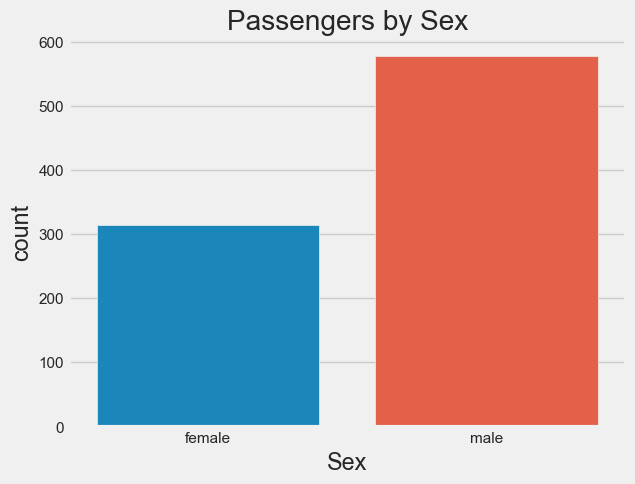

In [364]:
plt.figure()
t= sns.countplot(data=df, x='Sex')
plt.title('Passengers by Sex')
plt.show()

Text(0.5, 1.0, 'Passengers by Sex')

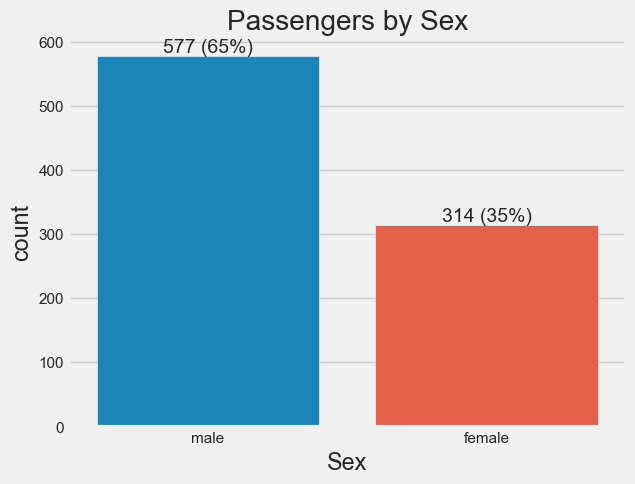

In [366]:
ax = sns.countplot(x=df['Sex'],
                   order=df['Sex'].value_counts(ascending=False).index);
        
abs_values = df['Sex'].value_counts(ascending=False)
rel_values = df['Sex'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Passengers by Sex')

Text(0.5, 1.0, 'Age distribution')

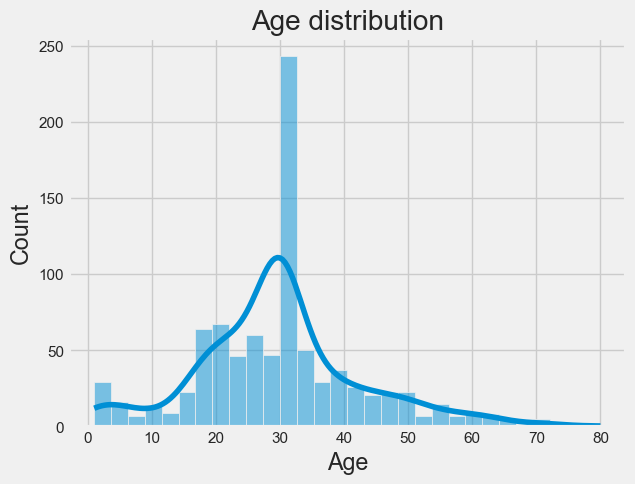

In [391]:
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age distribution')

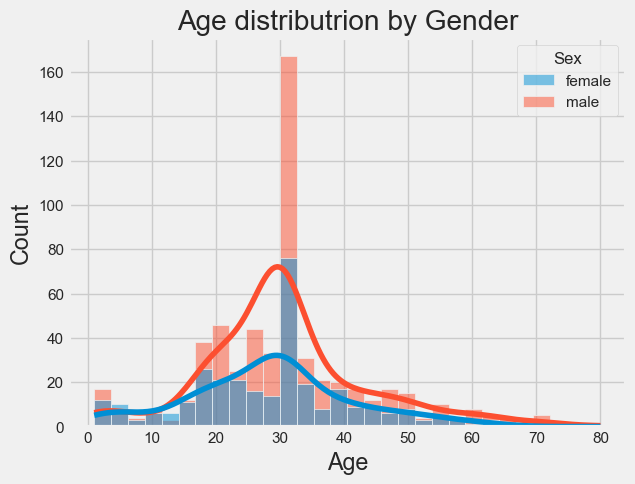

In [348]:
plt.figure()
sns.histplot(data=df, x='Age', hue='Sex', kde=True)
plt.title('Age distributrion by Gender')
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


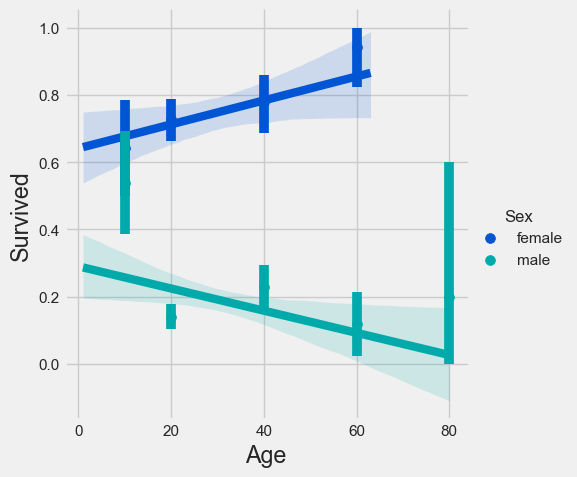

In [395]:
generations = [10,20,40,60,80]
sns.lmplot(data=df, x='Age', y='Survived', hue='Sex', palette='winter', x_bins=generations)

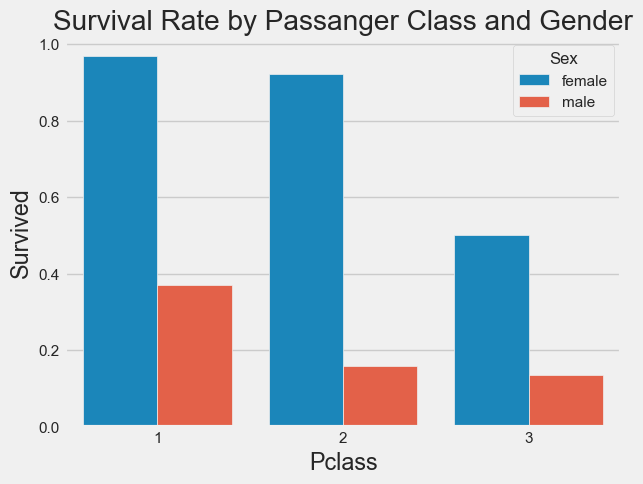

In [357]:
plt.figure()
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', errorbar=None)
plt.title('Survival Rate by Passanger Class and Gender')
plt.show()

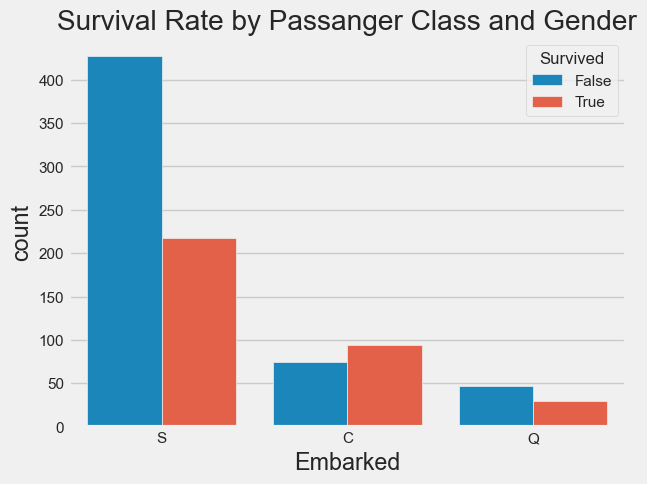

In [370]:
plt.figure()
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Count based on Embarkation Port')
plt.show()

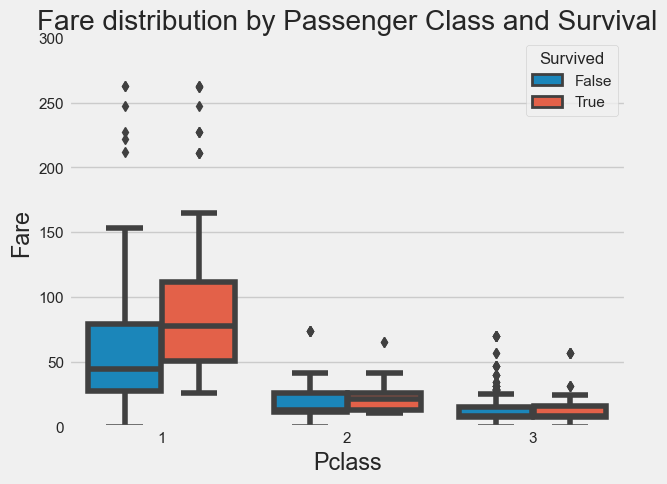

In [377]:
plt.figure()
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived')
plt.ylim(0, 300)
plt.title('Fare distribution by Passenger Class and Survival')
plt.show()

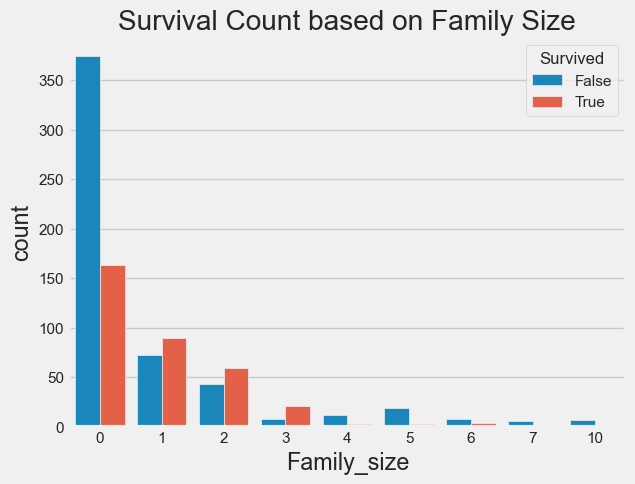

In [380]:
df['Family_size'] = df['SibSp'] + df['Parch']
sns.countplot(data=df, x='Family_size', hue='Survived')
plt.title('Survival Count based on Family Size')
plt.show()

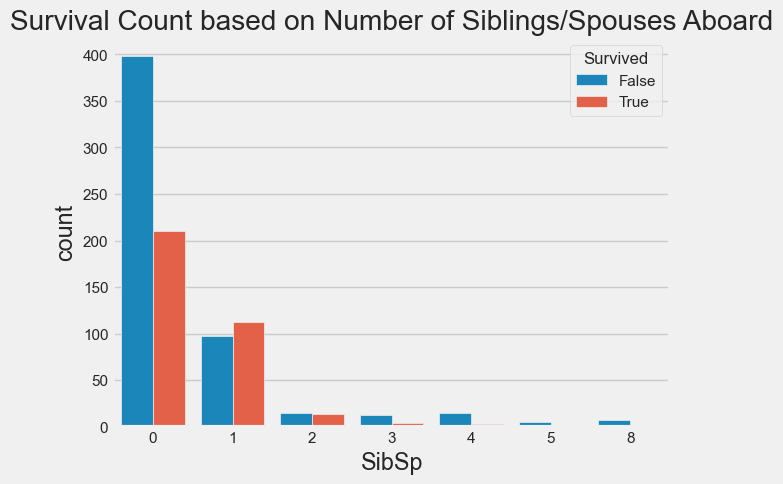

In [382]:
plt.figure()
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard')
plt.show()



    Gender and Survival: Women had a significantly higher survival rate than men

    Passenger Class: First-class passengers had a higher survival rate

    Embarkation Port: The survival count varied based on the embarkation port

    Fare Distribution: The majority of passengers paid lower fares, aligning with a larger number of third-class tickets.

    Fare and Survival: Within each passenger class, there is not a noticable pattern

    Siblings/Spouses: Those with one have a slightly better survival rate than those alone or with many siblings/spouses.

    Parents/Children: Passengers traveling alone or with one parent/child had higher survival rates compared to larger families.

    Family Size: Solo travelers and those with a small family size (1-3 members) had better survival outcomes than larger families.
    Age Distribution: Younger passengers (children) had a better survival rate, while the elderly had lower survival chances. Middle-aged individuals, especially males, formed the bulk of casualties.
